In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pingouin as pg
import itertools

In [2]:
def cosine_similarity(hist1, hist2):
    hist1 = np.array(hist1)
    hist2 = np.array(hist2)
    
    dot_product = np.dot(hist1, hist2)
    
    norm_hist1 = np.linalg.norm(hist1)
    norm_hist2 = np.linalg.norm(hist2)
    
    return dot_product / (norm_hist1 * norm_hist2)

# Sprawdzanie zmienności na współczynnik uczenia

In [1]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']

In [5]:
df = pd.read_csv('resunet_v1_weighted_losowa_1.csv', names=colnames, header=0)

In [6]:
df2 = pd.read_csv('resunet_v1_weighted_losowa_1.1.csv', names=colnames, header=0)

In [7]:
df3 = pd.read_csv('resunet_v1_weighted_losowa_1.2_mul5.csv', names=colnames, header=0)

In [8]:
df4 = pd.read_csv('resunet_v1_weighted_losowa_1.3_0.00005.csv', names=colnames, header=0)

In [9]:
df = df._append(df2, ignore_index=True)
df = df._append(df3, ignore_index=True)
df = df._append(df4, ignore_index=True)

In [10]:
df['epochs'] = range(1, len(df) + 1)

Text(0, 0.5, 'Wartość funkcji straty')

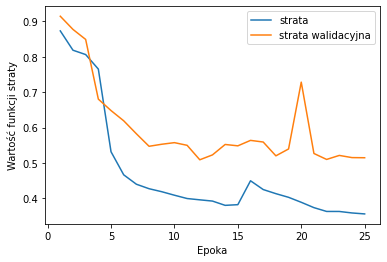

In [17]:
plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy(), label='strata')
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy(), label='strata walidacyjna')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość funkcji straty')

Text(0, 0.5, 'Wartość IoU')

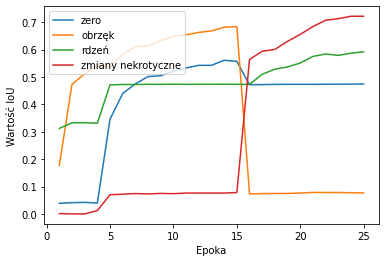

In [16]:
plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')

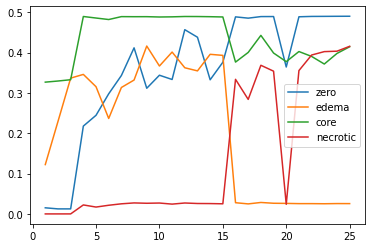

In [12]:
plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='edema')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='core')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='necrotic')
plt.legend() 

# Badanie wprowadzenia reprezentacji warstwowej

## Pobieranie losowe

In [45]:
epochs = range(1, 11)
df = pd.read_csv('resunet_v1_weighted_losowa_1.csv', names=colnames, header=0)
df['epochs'] = epochs

In [46]:
df2 = pd.read_csv('resunet_v1_weighted_losowa_2.csv', names=colnames, header=0)
df2['epochs'] = epochs

In [47]:
df3 = pd.read_csv('resunet_v1_weighted_losowa_3.csv', names=colnames, header=0)
df3['epochs'] = epochs

In [48]:
df4 = pd.read_csv('resunet_v1_weighted_losowa_4.csv', names=colnames, header=0)
df4['epochs'] = epochs

In [49]:
df5 = pd.read_csv('resunet_v1_weighted_losowa_5.csv', names=colnames, header=0)
df5['epochs'] = epochs

In [50]:
min_loss, max_loss, min_val_loss, max_val_loss, mean_loss, mean_val_loss, loss_std, val_loss_std = [], [], [], [], [], [], [], []

for epoch in range(10):
    df_loss = [item['loss'].iloc[epoch] for item in [df, df2, df3, df4, df5]]
    df_val_loss = [item['val_loss'].iloc[epoch] for item in [df, df2, df3, df4, df5]]

    min_loss.append(min(df_loss))
    max_loss.append(max(df_loss))
    min_val_loss.append(min(df_val_loss))
    max_val_loss.append(max(df_val_loss))
    mean_loss.append(sum(df_loss) / len(df_loss))
    mean_val_loss.append(sum(df_val_loss) / len(df_val_loss))
    loss_std.append(np.std(df_loss))
    val_loss_std.append(np.std(df_val_loss))

In [51]:
mean_loss[-1], mean_val_loss[-1]

(0.49591224193572997, 0.6322624981403351)

In [23]:
(min_loss[-1], max_loss[-1]), (min_val_loss[-1], max_val_loss[-1])

((0.3061306178569793, 0.6786695122718811),
 (0.4926376044750213, 0.7938420176506042))

Text(0, 0.5, 'Wartość odchylenia std. straty')

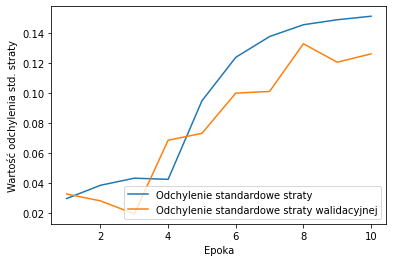

In [27]:
plt.plot(epochs, loss_std, label='Odchylenie standardowe straty')
plt.plot(epochs, val_loss_std, label='Odchylenie standardowe straty walidacyjnej')
plt.legend()
plt.xlabel('Epoka')
plt.ylabel('Wartość odchylenia std. straty')

Text(0, 0.5, 'Wartość funkcji straty')

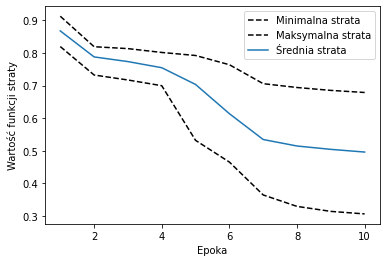

In [26]:
plt.plot(epochs, min_loss, 'k--', label='Minimalna strata')
plt.plot(epochs, max_loss, 'k--', label='Maksymalna strata')
plt.plot(epochs, mean_loss, label='Średnia strata')
plt.legend()
plt.xlabel('Epoka')
plt.ylabel('Wartość funkcji straty')

Text(0, 0.5, 'Wartość funkcji straty')

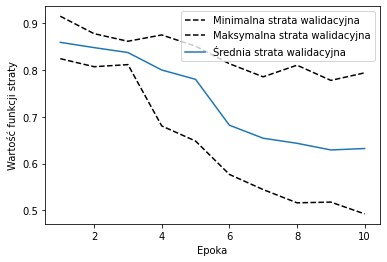

In [28]:
plt.plot(epochs, min_val_loss, 'k--', label='Minimalna strata walidacyjna')
plt.plot(epochs, max_val_loss, 'k--', label='Maksymalna strata walidacyjna')
plt.plot(epochs, mean_val_loss, label='Średnia strata walidacyjna')
plt.legend()
plt.xlabel('Epoka')
plt.ylabel('Wartość funkcji straty')

In [ ]:
with open('resunet_v1_weighted_losowa_1.1.pickle', 'rb') as handle:
    ious1 = pickle.load(handle)
with open('resunet_v1_weighted_losowa_2.pickle', 'rb') as handle:
    ious2 = pickle.load(handle)
with open('resunet_v1_weighted_losowa_3.pickle', 'rb') as handle:
    ious3 = pickle.load(handle)
with open('resunet_v1_weighted_losowa_4.pickle', 'rb') as handle:
    ious4 = pickle.load(handle)
with open('resunet_v1_weighted_losowa_5.pickle', 'rb') as handle:
    ious5 = pickle.load(handle)

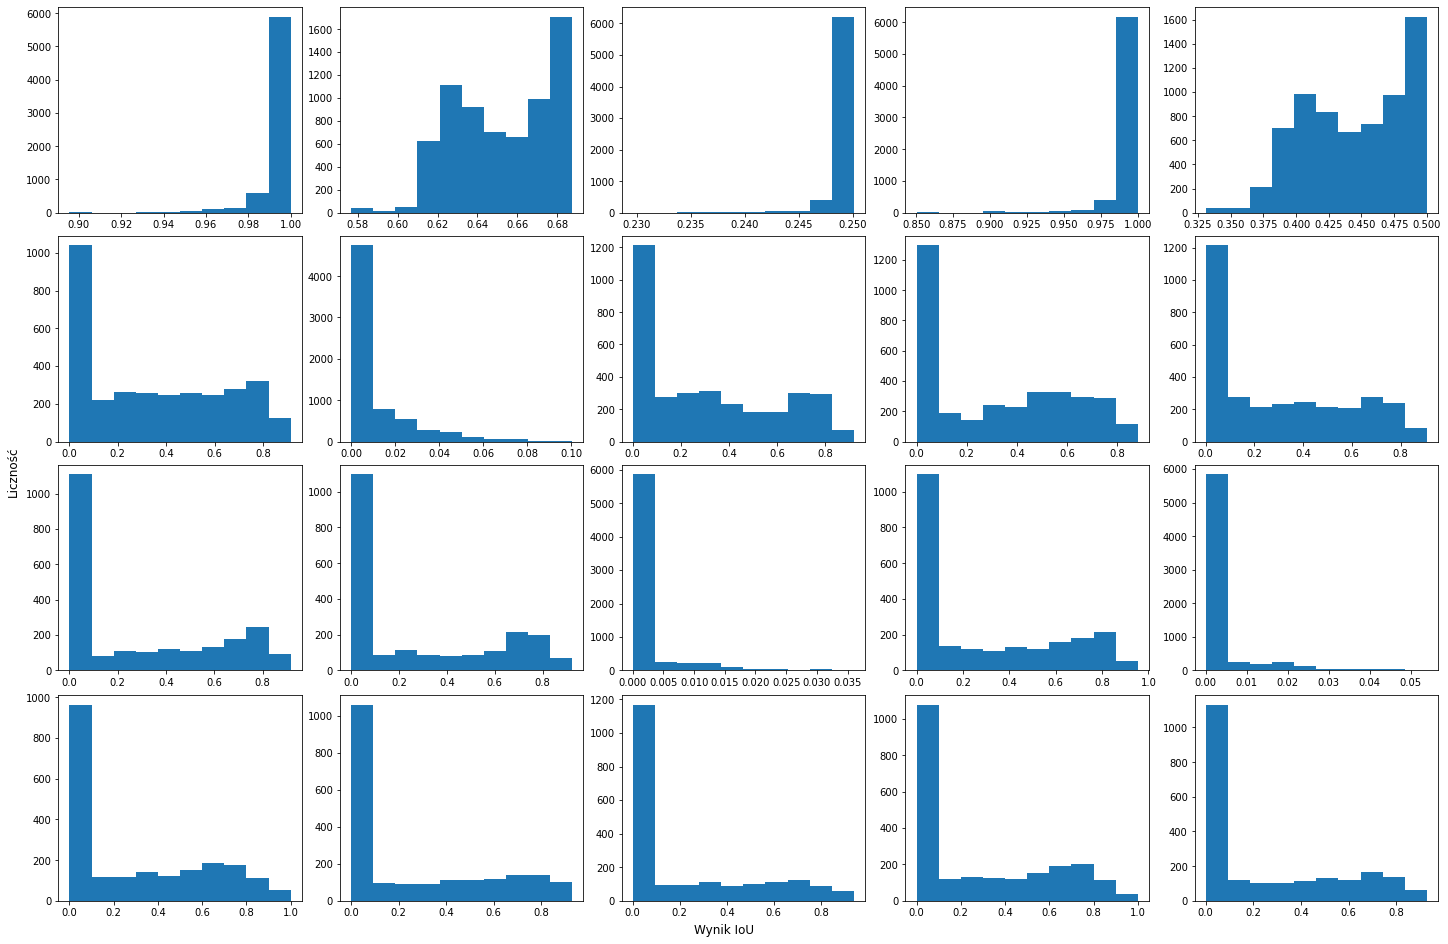

In [9]:
fig, axs = plt.subplots(4, 5, figsize=(20, 13), constrained_layout=True)
axs[0][0].hist(ious1[0])
axs[0][1].hist(ious2[0])
axs[0][2].hist(ious3[0])
axs[0][3].hist(ious4[0])
axs[0][4].hist(ious5[0])
axs[1][0].hist(ious1[1])
axs[1][1].hist(ious2[1])
axs[1][2].hist(ious3[1])
axs[1][3].hist(ious4[1])
axs[1][4].hist(ious5[1])
axs[2][0].hist(ious1[2])
axs[2][1].hist(ious2[2])
axs[2][2].hist(ious3[2])
axs[2][3].hist(ious4[2])
axs[2][4].hist(ious5[2])
axs[3][0].hist(ious1[3])
axs[3][1].hist(ious2[3])
axs[3][2].hist(ious3[3])
axs[3][3].hist(ious4[3])
axs[3][4].hist(ious5[3])

fig.supxlabel('Wynik IoU')
fig.supylabel('Liczność')
plt.show()

In [30]:
pd.Series([*ious1[0], *ious2[0], *ious3[0], *ious4[0], *ious5[0]]).describe()

count    34100.000000
mean         0.667485
std          0.296985
min          0.229614
25%          0.410679
50%          0.653412
75%          0.996712
max          1.000000
dtype: float64

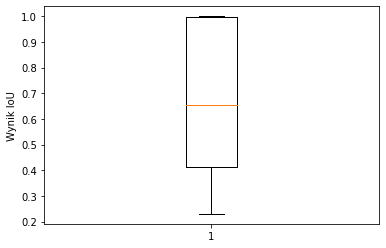

In [30]:
plt.boxplot([*ious1[0], *ious2[0], *ious3[0], *ious4[0], *ious5[0]])
plt.ylabel('Wynik IoU')
plt.show()

### Klasa 0

In [32]:
np.median(ious1[0]), np.median(ious2[0]), np.median(ious3[0]), np.median(ious4[0]), np.median(ious5[0])

(0.9999999, 0.6534118, 0.24999997, 0.99993885, 0.44736475)

In [33]:
pg.friedman(pd.DataFrame({'Group1': ious1[0], 'Group2': ious2[0], 'Group3': ious3[0], 'Group4': ious4[0], 'Group5': ious5[0]}))

,Source,W,ddof1,Q,p-unc
Friedman,Within,0.977071,4,26654.500249,0.0


In [128]:
ious_class1 = np.array([ious1[0], ious2[0], ious3[0], ious4[0], ious5[0]])
common_bin_edges = np.linspace(ious_class1.min(), ious_class1.max(), num=10)

In [130]:
# Generowanie histogramów z wspólnymi bin edges i normalizacja
hist_bin_edged = [np.histogram(ious_class1[probe], bins=common_bin_edges, density=True) for probe in range(5)]

hist1, bin_edges1 = np.histogram(ious_class1[0], bins=common_bin_edges, density=True)
hist2, bin_edges2 = np.histogram(ious_class1[1], bins=common_bin_edges, density=True)
hist3, bin_edges3 = np.histogram(ious_class1[2], bins=common_bin_edges, density=True)
hist4, bin_edges4 = np.histogram(ious_class1[3], bins=common_bin_edges, density=True)
hist5, bin_edges5 = np.histogram(ious_class1[4], bins=common_bin_edges, density=True)

In [131]:
similarities = []
for pair in itertools.combinations([hist1, hist2, hist3, hist4, hist5], 2):
    similarities.append(cosine_similarity(*pair))

In [132]:
similarities

[0.0, 0.0, 0.999952033035662, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [133]:
pd.Series(similarities).describe()

count    10.000000
mean      0.099995
std       0.316213
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.999952
dtype: float64

### Klasa 1

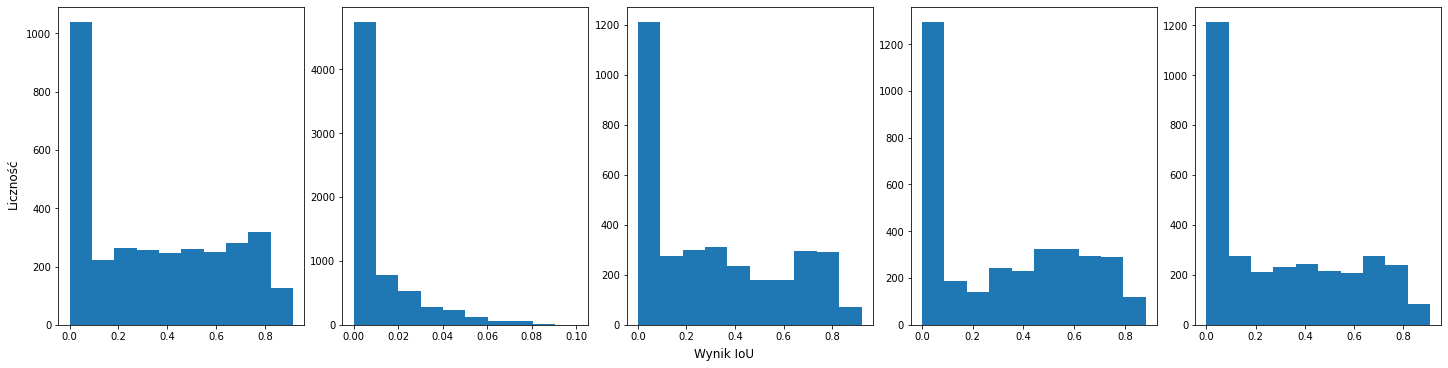

In [32]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5), constrained_layout=True)
axs[0].hist(ious1[1])
axs[1].hist(ious2[1])
axs[2].hist(ious3[1])
axs[3].hist(ious4[1])
axs[4].hist(ious5[1])
fig.supxlabel('Wynik IoU')
fig.supylabel('Liczność')
plt.show()

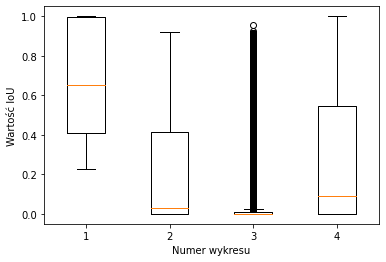

In [49]:
probes1 = np.array([*ious1[1], *ious2[1], *ious3[1], *ious4[1], *ious5[1]])
probes1 = probes1[np.isfinite(probes1)]
probes2 = np.array([*ious1[2], *ious2[2], *ious3[2], *ious4[2], *ious5[2]])
probes2 = probes2[np.isfinite(probes2)]
probes3 = np.array([*ious1[3], *ious2[3], *ious3[3], *ious4[3], *ious5[3]])
probes3 = probes3[np.isfinite(probes3)]

plt.boxplot([[*ious1[0], *ious2[0], *ious3[0], *ious4[0], *ious5[0]], probes1, probes2, probes3])
plt.xlabel('Numer wykresu')
plt.ylabel('Wartość IoU')
plt.show()

In [69]:
pd.Series([*ious1[1], *ious2[1], *ious3[1], *ious4[1], *ious5[1]]).describe()

count    20082.000000
mean         0.210102
std          0.275265
min          0.000000
25%          0.000000
50%          0.027494
75%          0.415625
max          0.920000
dtype: float64

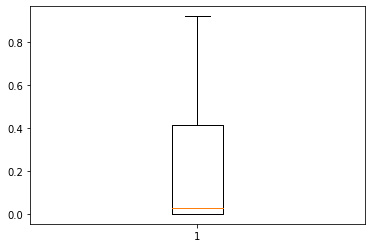

In [34]:
probes = np.array([*ious1[1], *ious2[1], *ious3[1], *ious4[1], *ious5[1]])
probes = probes[np.isfinite(probes)]
plt.boxplot(probes)
plt.show()

In [76]:
pg.friedman(pd.DataFrame({'Group1': ious1[1], 'Group2': ious2[1], 'Group3': ious3[1], 'Group4': ious4[1], 'Group5': ious5[1]}))

,Source,W,ddof1,Q,p-unc
Friedman,Within,0.181821,4,2285.12592,0.0


In [15]:
ious_class2 = [probe[np.isfinite(probe)] for probe in map(np.array, [ious1[1], ious2[1], ious3[1], ious4[1], ious5[1]])]
common_bin_edges = np.linspace(min([elem.min() for elem in ious_class2]), max([elem.max() for elem in ious_class2]), num=10)

hist_bin_edged = [np.histogram(ious_class2[probe], bins=common_bin_edges, density=True) for probe in range(5)]

hist1, bin_edges1 = np.histogram(ious_class2[0], bins=common_bin_edges, density=True)
hist2, bin_edges2 = np.histogram(ious_class2[1], bins=common_bin_edges, density=True)
hist3, bin_edges3 = np.histogram(ious_class2[2], bins=common_bin_edges, density=True)
hist4, bin_edges4 = np.histogram(ious_class2[3], bins=common_bin_edges, density=True)
hist5, bin_edges5 = np.histogram(ious_class2[4], bins=common_bin_edges, density=True)

In [80]:
np.median(ious_class2[0]), np.median(ious_class2[1]), np.median(ious_class2[2]), np.median(ious_class2[3]), np.median(ious_class2[4])

(0.3150342106819153,
 0.0,
 0.24315065145492554,
 0.30851060152053833,
 0.2358059585094452)

In [16]:
similarities = []
for pair in itertools.combinations([hist1, hist2, hist3, hist4, hist5], 2):
    similarities.append(cosine_similarity(*pair))

In [17]:
similarities

[0.800945083242334,
 0.992242645237167,
 0.9857509468680036,
 0.9894925366116679,
 0.8451695973799336,
 0.8564041433611608,
 0.8664830424046819,
 0.9799123878716374,
 0.9951522203076623,
 0.9906612511447418]

In [18]:
pd.Series(similarities).describe()

count    10.000000
mean      0.930221
std       0.077631
min       0.800945
25%       0.858924
50%       0.982832
75%       0.990369
max       0.995152
dtype: float64

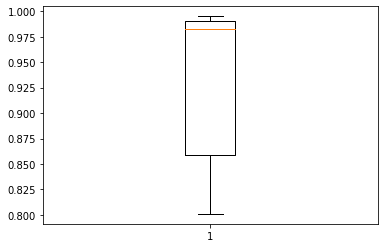

In [19]:
plt.boxplot(similarities)
plt.show()

In [84]:
pd.Series(similarities).describe()

count    10.000000
mean      0.930221
std       0.077631
min       0.800945
25%       0.858924
50%       0.982832
75%       0.990369
max       0.995152
dtype: float64

### Klasa 2

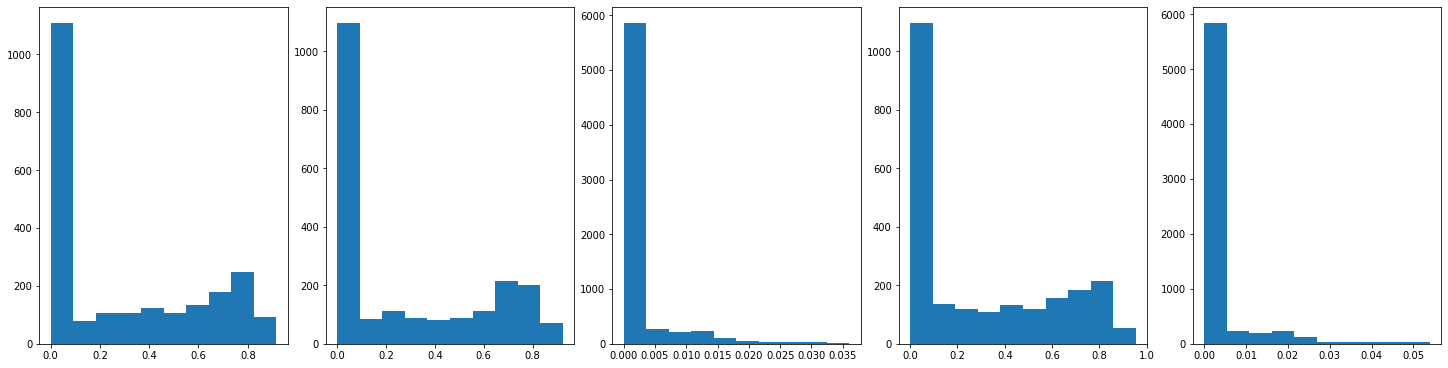

In [89]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5), constrained_layout=True)
axs[0].hist(ious1[2])
axs[1].hist(ious2[2])
axs[2].hist(ious3[2])
axs[3].hist(ious4[2])
axs[4].hist(ious5[2])
plt.show()

In [91]:
pd.Series([*ious1[2], *ious2[2], *ious3[2], *ious4[2], *ious5[2]]).describe()

count    20394.000000
mean         0.094677
std          0.224574
min          0.000000
25%          0.000000
50%          0.000000
75%          0.009846
max          0.953901
dtype: float64

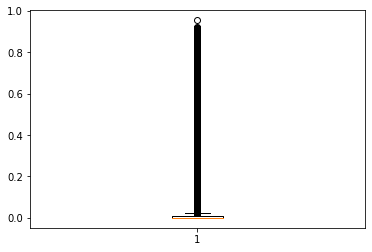

In [38]:
probes = np.array([*ious1[2], *ious2[2], *ious3[2], *ious4[2], *ious5[2]])
probes = probes[np.isfinite(probes)]
plt.boxplot(probes)
plt.show()

In [98]:
pg.friedman(pd.DataFrame({'Group1': ious1[2], 'Group2': ious2[2], 'Group3': ious3[2], 'Group4': ious4[2], 'Group5': ious5[2]}))

,Source,W,ddof1,Q,p-unc
Friedman,Within,0.118455,4,1004.023357,4.793760e-216


In [20]:
ious_class3 = [probe[np.isfinite(probe)] for probe in map(np.array, [ious1[2], ious2[2], ious3[2], ious4[2], ious5[2]])]
common_bin_edges = np.linspace(min([elem.min() for elem in ious_class3]), max([elem.max() for elem in ious_class3]), num=10)

hist_bin_edged = [np.histogram(ious_class3[probe], bins=common_bin_edges, density=True) for probe in range(5)]

hist1, bin_edges1 = np.histogram(ious_class3[0], bins=common_bin_edges, density=True)
hist2, bin_edges2 = np.histogram(ious_class3[1], bins=common_bin_edges, density=True)
hist3, bin_edges3 = np.histogram(ious_class3[2], bins=common_bin_edges, density=True)
hist4, bin_edges4 = np.histogram(ious_class3[3], bins=common_bin_edges, density=True)
hist5, bin_edges5 = np.histogram(ious_class3[4], bins=common_bin_edges, density=True)

In [21]:
np.median(ious_class3[0]), np.median(ious_class3[1]), np.median(ious_class3[2]), np.median(ious_class3[3]), np.median(ious_class3[4])

(0.13114751875400543, 0.06666666269302368, 0.0, 0.138888880610466, 0.0)

In [22]:
similarities = []
for pair in itertools.combinations([hist1, hist2, hist3, hist4, hist5], 2):
    similarities.append(cosine_similarity(*pair))

In [23]:
similarities

[0.9976508707833347,
 0.9289402750608172,
 0.9988608029914527,
 0.9289402750608172,
 0.939683399204703,
 0.997714105884775,
 0.939683399204703,
 0.9282177042957115,
 1.0,
 0.9282177042957115]

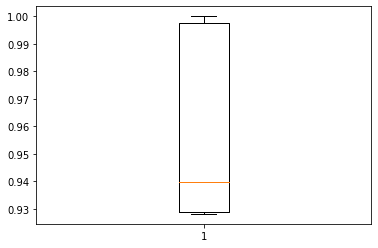

In [24]:
plt.boxplot(similarities)
plt.show()

In [25]:
pd.Series(similarities).describe()

count    10.000000
mean      0.958791
std       0.034497
min       0.928218
25%       0.928940
50%       0.939683
75%       0.997698
max       1.000000
dtype: float64

### Klasa 3

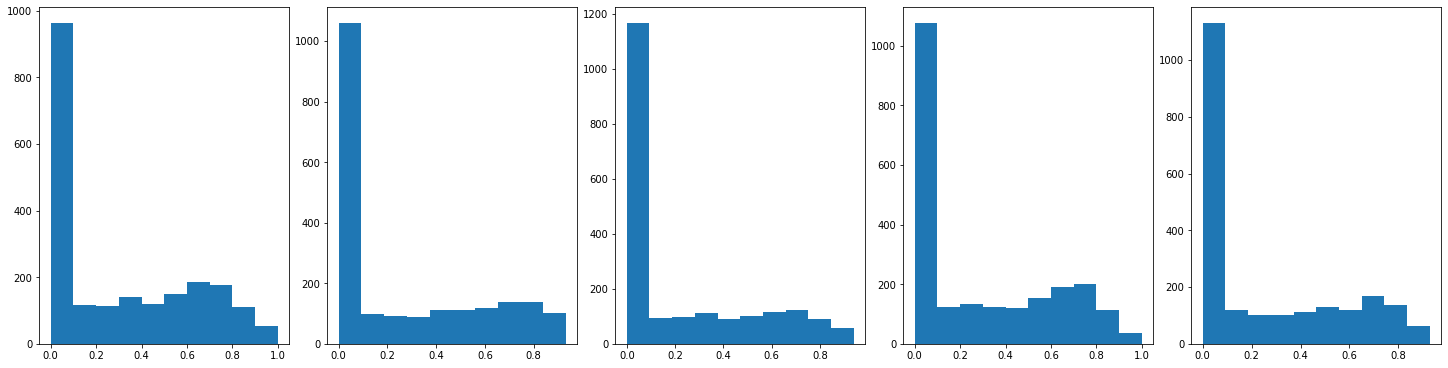

In [111]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5), constrained_layout=True)
axs[0].hist(ious1[3])
axs[1].hist(ious2[3])
axs[2].hist(ious3[3])
axs[3].hist(ious4[3])
axs[4].hist(ious5[3])
plt.show()

In [112]:
pd.Series([*ious1[3], *ious2[3], *ious3[3], *ious4[3], *ious5[3]]).describe()

count    10692.000000
mean         0.263112
std          0.307100
min          0.000000
25%          0.000000
50%          0.088889
75%          0.544839
max          1.000000
dtype: float64

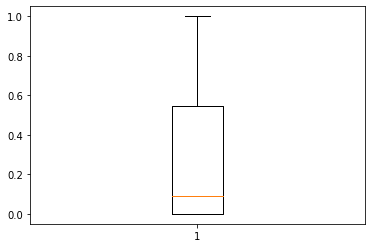

In [39]:
probes = np.array([*ious1[3], *ious2[3], *ious3[3], *ious4[3], *ious5[3]])
probes = probes[np.isfinite(probes)]
plt.boxplot(probes)
plt.show()

In [113]:
pg.friedman(pd.DataFrame({'Group1': ious1[3], 'Group2': ious2[3], 'Group3': ious3[3], 'Group4': ious4[3], 'Group5': ious5[3]}))

,Source,W,ddof1,Q,p-unc
Friedman,Within,0.091659,4,720.070669,1.571052e-154


In [114]:
ious_class4 = [probe[np.isfinite(probe)] for probe in map(np.array, [ious1[3], ious2[3], ious3[3], ious4[3], ious5[3]])]
common_bin_edges = np.linspace(min([elem.min() for elem in ious_class4]), max([elem.max() for elem in ious_class4]), num=10)

hist_bin_edged = [np.histogram(ious_class4[probe], bins=common_bin_edges, density=True) for probe in range(5)]

hist1, bin_edges1 = np.histogram(ious_class4[0], bins=common_bin_edges, density=True)
hist2, bin_edges2 = np.histogram(ious_class4[1], bins=common_bin_edges, density=True)
hist3, bin_edges3 = np.histogram(ious_class4[2], bins=common_bin_edges, density=True)
hist4, bin_edges4 = np.histogram(ious_class4[3], bins=common_bin_edges, density=True)
hist5, bin_edges5 = np.histogram(ious_class4[4], bins=common_bin_edges, density=True)

In [116]:
np.median(ious_class4[0]), np.median(ious_class4[1]), np.median(ious_class4[2]), np.median(ious_class4[3]), np.median(ious_class4[4])

(0.18283580243587494,
 0.07231434807181358,
 0.0,
 0.14405593276023865,
 0.06857141852378845)

In [117]:
similarities = []
for pair in itertools.combinations([hist1, hist2, hist3, hist4, hist5], 2):
    similarities.append(cosine_similarity(*pair))

In [118]:
similarities

[0.9949805649233313,
 0.9883560480613398,
 0.9993949701621818,
 0.9947102467137429,
 0.9968924956689816,
 0.9966196211169598,
 0.9992842411432339,
 0.9914555203772561,
 0.996807890162208,
 0.9968087557730385]

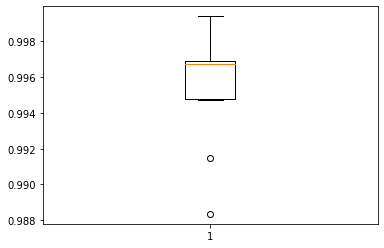

In [119]:
plt.boxplot(similarities)
plt.show()

In [120]:
pd.Series(similarities).describe()

count    10.000000
mean      0.995531
std       0.003406
min       0.988356
25%       0.994778
50%       0.996714
75%       0.996872
max       0.999395
dtype: float64

## Pobieranie warstwowo-losowe

In [3]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
epochs = range(1, 11)

In [11]:
epochs = range(1, 11)
df = pd.read_csv('resunet_v1_weighted_warstwowe_1.csv', names=colnames, header=0)
df['epochs'] = epochs

In [12]:
df2 = pd.read_csv('resunet_v1_weighted_warstwowe_2.csv', names=colnames, header=0)
df2['epochs'] = epochs

In [13]:
df3 = pd.read_csv('resunet_v1_weighted_warstwowe_3.csv', names=colnames, header=0)
df3['epochs'] = epochs

In [14]:
df4 = pd.read_csv('resunet_v1_weighted_warstwowe_4.csv', names=colnames, header=0)
df4['epochs'] = epochs

In [15]:
df5 = pd.read_csv('resunet_v1_weighted_warstwowe_5.csv', names=colnames, header=0)
df5['epochs'] = epochs

In [16]:
min_loss, max_loss, min_val_loss, max_val_loss, mean_loss, mean_val_loss, loss_std, val_loss_std = [], [], [], [], [], [], [], []

for epoch in range(10):
    df_loss = [item['loss'].iloc[epoch] for item in [df, df2, df3, df4, df5]]
    df_val_loss = [item['val_loss'].iloc[epoch] for item in [df, df2, df3, df4, df5]]

    min_loss.append(min(df_loss))
    max_loss.append(max(df_loss))
    min_val_loss.append(min(df_val_loss))
    max_val_loss.append(max(df_val_loss))
    mean_loss.append(sum(df_loss) / len(df_loss))
    mean_val_loss.append(sum(df_val_loss) / len(df_val_loss))
    loss_std.append(np.std(df_loss))
    val_loss_std.append(np.std(df_val_loss))

In [17]:
mean_loss[-1], mean_val_loss[-1]

(0.38363733887672424, 0.5225753486156464)

Text(0, 0.5, 'Wartość odchylenia std. straty')

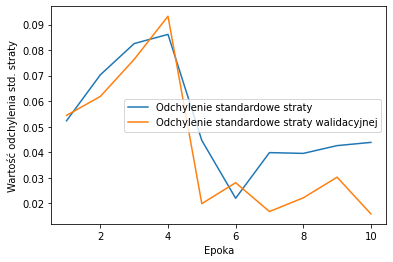

In [18]:
plt.plot(epochs, loss_std, label='Odchylenie standardowe straty')
plt.plot(epochs, val_loss_std, label='Odchylenie standardowe straty walidacyjnej')
plt.legend()
plt.xlabel('Epoka')
plt.ylabel('Wartość odchylenia std. straty')

Text(0, 0.5, 'Wartość funkcji straty')

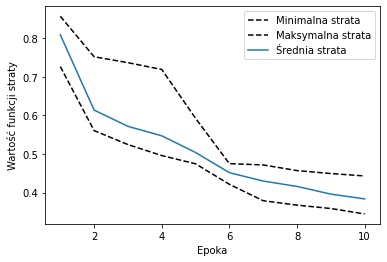

In [19]:
plt.plot(epochs, min_loss, 'k--', label='Minimalna strata')
plt.plot(epochs, max_loss, 'k--', label='Maksymalna strata')
plt.plot(epochs, mean_loss, label='Średnia strata')
plt.legend()
plt.xlabel('Epoka')
plt.ylabel('Wartość funkcji straty')

Text(0, 0.5, 'Wartość funkcji straty')

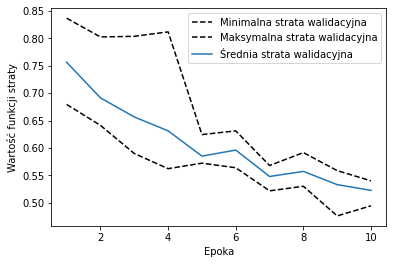

In [20]:
plt.plot(epochs, min_val_loss, 'k--', label='Minimalna strata walidacyjna')
plt.plot(epochs, max_val_loss, 'k--', label='Maksymalna strata walidacyjna')
plt.plot(epochs, mean_val_loss, label='Średnia strata walidacyjna')
plt.legend()
plt.xlabel('Epoka')
plt.ylabel('Wartość funkcji straty')

In [ ]:
(min_loss[-1], max_loss[-1]), (min_val_loss[-1], max_val_loss[-1])

((0.3447512090206146, 0.4430765211582184),
 (0.4944791495800018, 0.5399668216705322))

In [21]:
with open('resunet_v1_weighted_warstwowe_1.pickle', 'rb') as handle:
    ious1 = pickle.load(handle)
with open('resunet_v1_weighted_warstwowe_2.pickle', 'rb') as handle:
    ious2 = pickle.load(handle)
with open('resunet_v1_weighted_warstwowe_3.pickle', 'rb') as handle:
    ious3 = pickle.load(handle)
with open('resunet_v1_weighted_warstwowe_4.pickle', 'rb') as handle:
    ious4 = pickle.load(handle)
with open('resunet_v1_weighted_warstwowe_5.pickle', 'rb') as handle:
    ious5 = pickle.load(handle)

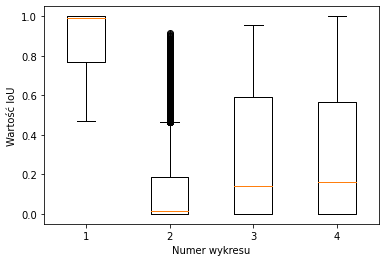

In [22]:
probes1 = np.array([*ious1[1], *ious2[1], *ious3[1], *ious4[1], *ious5[1]])
probes1 = probes1[np.isfinite(probes1)]
probes2 = np.array([*ious1[2], *ious2[2], *ious3[2], *ious4[2], *ious5[2]])
probes2 = probes2[np.isfinite(probes2)]
probes3 = np.array([*ious1[3], *ious2[3], *ious3[3], *ious4[3], *ious5[3]])
probes3 = probes3[np.isfinite(probes3)]

plt.boxplot([[*ious1[0], *ious2[0], *ious3[0], *ious4[0], *ious5[0]], probes1, probes2, probes3])
plt.xlabel('Numer wykresu')
plt.ylabel('Wartość IoU')
plt.show()

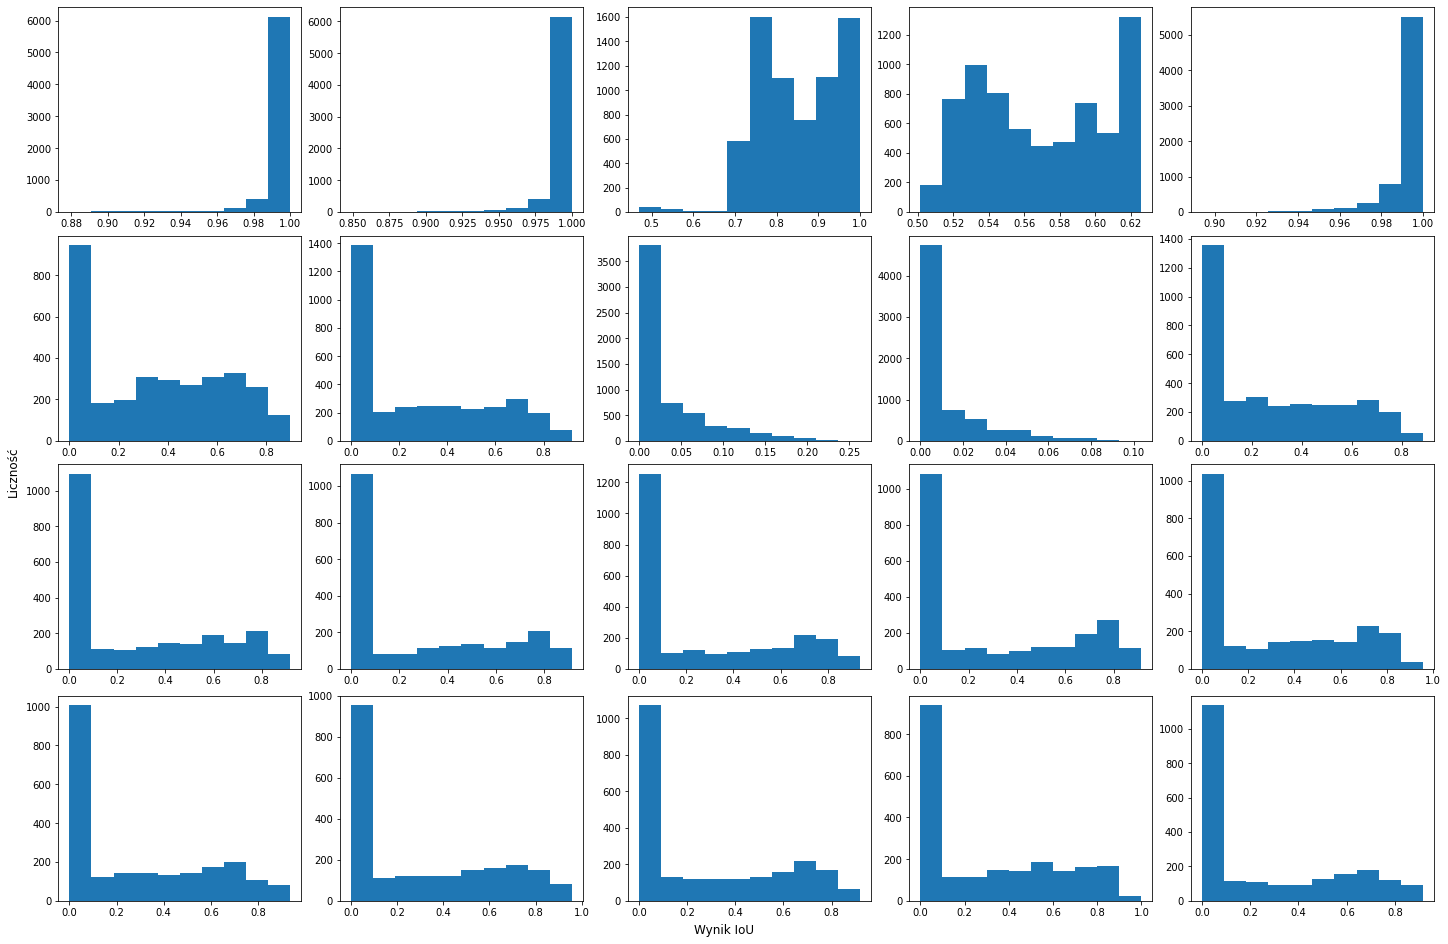

In [23]:
fig, axs = plt.subplots(4, 5, figsize=(20, 13), constrained_layout=True)
axs[0][0].hist(ious1[0])
axs[0][1].hist(ious2[0])
axs[0][2].hist(ious3[0])
axs[0][3].hist(ious4[0])
axs[0][4].hist(ious5[0])
axs[1][0].hist(ious1[1])
axs[1][1].hist(ious2[1])
axs[1][2].hist(ious3[1])
axs[1][3].hist(ious4[1])
axs[1][4].hist(ious5[1])
axs[2][0].hist(ious1[2])
axs[2][1].hist(ious2[2])
axs[2][2].hist(ious3[2])
axs[2][3].hist(ious4[2])
axs[2][4].hist(ious5[2])
axs[3][0].hist(ious1[3])
axs[3][1].hist(ious2[3])
axs[3][2].hist(ious3[3])
axs[3][3].hist(ious4[3])
axs[3][4].hist(ious5[3])

fig.supxlabel('Wynik IoU')
fig.supylabel('Liczność')
plt.show()

### Klasa 0

In [ ]:
pd.Series([*ious1[0], *ious2[0], *ious3[0], *ious4[0], *ious5[0]]).describe()

count    34100.000000
mean         0.881309
std          0.171944
min          0.469734
25%          0.767972
50%          0.991609
75%          1.000000
max          1.000000
dtype: float64

In [ ]:
pg.friedman(pd.DataFrame({'Group1': ious1[0], 'Group2': ious2[0], 'Group3': ious3[0], 'Group4': ious4[0], 'Group5': ious5[0]}))

,Source,W,ddof1,Q,p-unc
Friedman,Within,0.855857,4,23347.775329,0.0


In [ ]:
ious_class1 = np.array([ious1[0], ious2[0], ious3[0], ious4[0], ious5[0]])
common_bin_edges = np.linspace(ious_class1.min(), ious_class1.max(), num=10)

In [ ]:
# Generowanie histogramów z wspólnymi bin edges i normalizacja
hist_bin_edged = [np.histogram(ious_class1[probe], bins=common_bin_edges, density=True) for probe in range(5)]

hist1, bin_edges1 = np.histogram(ious_class1[0], bins=common_bin_edges, density=True)
hist2, bin_edges2 = np.histogram(ious_class1[1], bins=common_bin_edges, density=True)
hist3, bin_edges3 = np.histogram(ious_class1[2], bins=common_bin_edges, density=True)
hist4, bin_edges4 = np.histogram(ious_class1[3], bins=common_bin_edges, density=True)
hist5, bin_edges5 = np.histogram(ious_class1[4], bins=common_bin_edges, density=True)

In [ ]:
similarities = []
for pair in itertools.combinations([hist1, hist2, hist3, hist4, hist5], 2):
    similarities.append(cosine_similarity(*pair))

In [ ]:
similarities

[0.9999927774369852,
 0.5648781472352389,
 0.0,
 0.9999726752030282,
 0.563878416483476,
 0.0,
 0.9999915576843001,
 0.011269103840840983,
 0.5619948769955229,
 0.0]

In [ ]:
pd.Series(similarities).describe()

count    10.000000
mean      0.470198
std       0.439958
min       0.000000
25%       0.002817
50%       0.562937
75%       0.891199
max       0.999993
dtype: float64

### Klasa 1

In [ ]:
pd.Series([*ious1[1], *ious2[1], *ious3[1], *ious4[1], *ious5[1]]).describe()

count    22822.000000
mean         0.143854
std          0.233714
min          0.000000
25%          0.000000
50%          0.013158
75%          0.185781
max          0.917293
dtype: float64

In [ ]:
ious_class2 = [probe[np.isfinite(probe)] for probe in map(np.array, [ious1[1], ious2[1], ious3[1], ious4[1], ious5[1]])]
common_bin_edges = np.linspace(min([elem.min() for elem in ious_class2]), max([elem.max() for elem in ious_class2]), num=10)

hist_bin_edged = [np.histogram(ious_class2[probe], bins=common_bin_edges, density=True) for probe in range(5)]

hist1, bin_edges1 = np.histogram(ious_class2[0], bins=common_bin_edges, density=True)
hist2, bin_edges2 = np.histogram(ious_class2[1], bins=common_bin_edges, density=True)
hist3, bin_edges3 = np.histogram(ious_class2[2], bins=common_bin_edges, density=True)
hist4, bin_edges4 = np.histogram(ious_class2[3], bins=common_bin_edges, density=True)
hist5, bin_edges5 = np.histogram(ious_class2[4], bins=common_bin_edges, density=True)

In [ ]:
similarities = []
for pair in itertools.combinations([hist1, hist2, hist3, hist4, hist5], 2):
    similarities.append(cosine_similarity(*pair))

print(similarities)

[0.9657019441150326, 0.7721897995732652, 0.756759893819911, 0.9695674989806626, 0.9061411020510339, 0.8952101498466135, 0.9933309202085142, 0.9944533951130177, 0.8890390748644709, 0.8702558826130078]


In [ ]:
pd.Series(similarities).describe()

count    10.000000
mean      0.901265
std       0.084782
min       0.756760
25%       0.874952
50%       0.900676
75%       0.968601
max       0.994453
dtype: float64

In [ ]:
pg.friedman(pd.DataFrame({'Group1': ious1[1], 'Group2': ious2[1], 'Group3': ious3[1], 'Group4': ious4[1], 'Group5': ious5[1]}))

,Source,W,ddof1,Q,p-unc
Friedman,Within,0.282264,4,3566.693851,0.0


### Klasa 2

In [ ]:
pd.Series([*ious1[2], *ious2[2], *ious3[2], *ious4[2], *ious5[2]]).describe()

count    11606.000000
mean         0.285532
std          0.314191
min          0.000000
25%          0.000000
50%          0.140175
75%          0.589463
max          0.955017
dtype: float64

In [ ]:
ious_class3 = [probe[np.isfinite(probe)] for probe in map(np.array, [ious1[2], ious2[2], ious3[2], ious4[2], ious5[2]])]
common_bin_edges = np.linspace(min([elem.min() for elem in ious_class3]), max([elem.max() for elem in ious_class3]), num=10)

hist_bin_edged = [np.histogram(ious_class3[probe], bins=common_bin_edges, density=True) for probe in range(5)]

hist1, bin_edges1 = np.histogram(ious_class3[0], bins=common_bin_edges, density=True)
hist2, bin_edges2 = np.histogram(ious_class3[1], bins=common_bin_edges, density=True)
hist3, bin_edges3 = np.histogram(ious_class3[2], bins=common_bin_edges, density=True)
hist4, bin_edges4 = np.histogram(ious_class3[3], bins=common_bin_edges, density=True)
hist5, bin_edges5 = np.histogram(ious_class3[4], bins=common_bin_edges, density=True)

In [ ]:
similarities = []
for pair in itertools.combinations([hist1, hist2, hist3, hist4, hist5], 2):
    similarities.append(cosine_similarity(*pair))

print(similarities)

[0.9979583558572487, 0.9937382207510332, 0.9946805461663042, 0.9970100996996736, 0.9963868689615141, 0.9969361873892775, 0.9967817045847246, 0.9963028736747712, 0.9949528406719551, 0.9958127112560398]


In [ ]:
pd.Series(similarities).describe()

count    10.000000
mean      0.996056
std       0.001271
min       0.993738
25%       0.995168
50%       0.996345
75%       0.996898
max       0.997958
dtype: float64

In [ ]:
pg.friedman(pd.DataFrame({'Group1': ious1[2], 'Group2': ious2[2], 'Group3': ious3[2], 'Group4': ious4[2], 'Group5': ious5[2]}))

,Source,W,ddof1,Q,p-unc
Friedman,Within,0.01498,4,128.768496,7.140845e-27


### Klasa 3

In [ ]:
pd.Series([*ious1[3], *ious2[3], *ious3[3], *ious4[3], *ious5[3]]).describe()

count    11040.000000
mean         0.282505
std          0.306741
min          0.000000
25%          0.000000
50%          0.161255
75%          0.568658
max          1.000000
dtype: float64

In [ ]:
ious_class4 = [probe[np.isfinite(probe)] for probe in map(np.array, [ious1[3], ious2[3], ious3[3], ious4[3], ious5[3]])]
common_bin_edges = np.linspace(min([elem.min() for elem in ious_class4]), max([elem.max() for elem in ious_class4]), num=10)

hist_bin_edged = [np.histogram(ious_class4[probe], bins=common_bin_edges, density=True) for probe in range(5)]

hist1, bin_edges1 = np.histogram(ious_class4[0], bins=common_bin_edges, density=True)
hist2, bin_edges2 = np.histogram(ious_class4[1], bins=common_bin_edges, density=True)
hist3, bin_edges3 = np.histogram(ious_class4[2], bins=common_bin_edges, density=True)
hist4, bin_edges4 = np.histogram(ious_class4[3], bins=common_bin_edges, density=True)
hist5, bin_edges5 = np.histogram(ious_class4[4], bins=common_bin_edges, density=True)

In [ ]:
similarities = []
for pair in itertools.combinations([hist1, hist2, hist3, hist4, hist5], 2):
    similarities.append(cosine_similarity(*pair))

print(similarities)

[0.9966870433897582, 0.9979802436021781, 0.9957162731987628, 0.9930895888541963, 0.9976566329146317, 0.9987610534405381, 0.9954022027560158, 0.9956899551477012, 0.9953311992677992, 0.9915980073835358]


In [ ]:
pd.Series(similarities).describe()

count    10.000000
mean      0.995791
std       0.002190
min       0.991598
25%       0.995349
50%       0.995703
75%       0.997414
max       0.998761
dtype: float64

In [ ]:
pg.friedman(pd.DataFrame({'Group1': ious1[3], 'Group2': ious2[3], 'Group3': ious3[3], 'Group4': ious4[3], 'Group5': ious5[3]}))

,Source,W,ddof1,Q,p-unc
Friedman,Within,0.041925,4,344.119222,3.263293e-73


# Badanie zastosowania kontekstów przestrzennych bez jak i z pełną reprezentacją warstwową

## Pobieranie warstwowo-sekwencyjne

In [5]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
epochs = range(1, 11)

In [6]:
df = pd.read_csv('resunet_v1_weighted_sekwencyjne_1.csv', names=colnames, header=0)
df['epochs'] = epochs

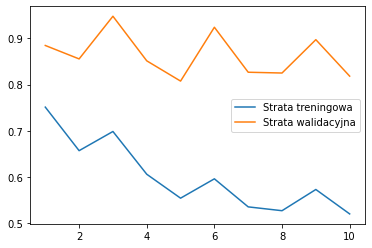

In [11]:
plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy(), label='Strata treningowa')
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy(), label='Strata walidacyjna')
plt.legend()
plt.show()

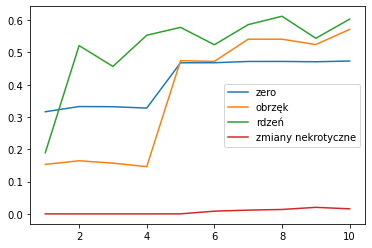

In [14]:
plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.show()

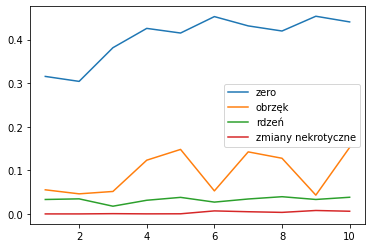

In [18]:
plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.show()

## Pobieranie kontekstualne

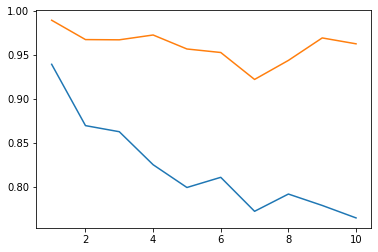

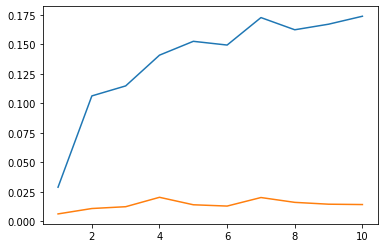

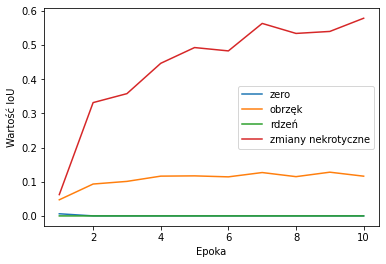

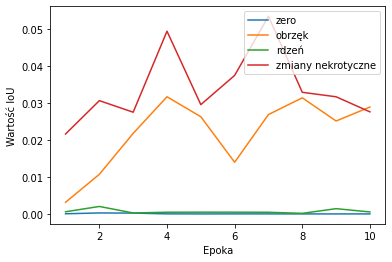

In [24]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
df = pd.read_csv('resunet_v1_weighted_kontekstualne_80_1.csv', names=colnames, header=0)
df['epochs'] = range(1, 11)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

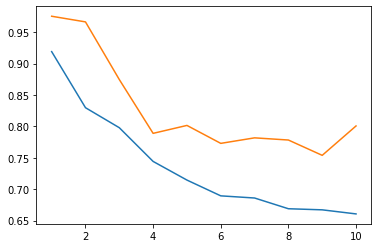

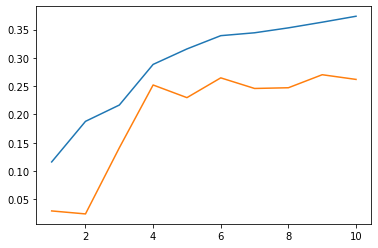

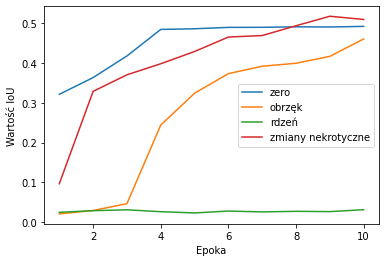

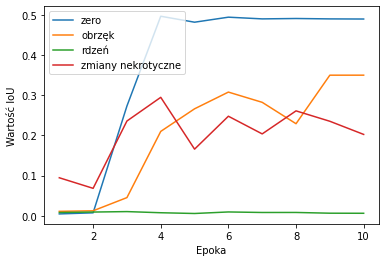

In [25]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
df = pd.read_csv('resunet_v1_weighted_kontekstualne_10_1.csv', names=colnames, header=0)
df['epochs'] = range(1, 11)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

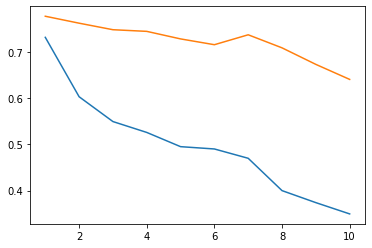

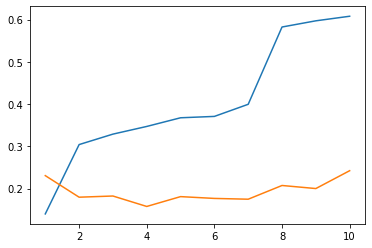

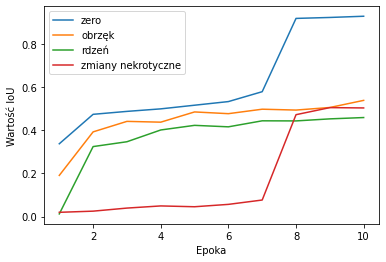

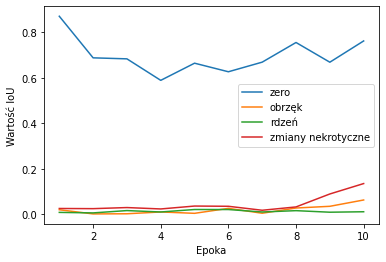

In [26]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
df = pd.read_csv('resunet_v1_dice_kontekstualne_80_1.csv', names=colnames, header=0)
df['epochs'] = range(1, 11)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

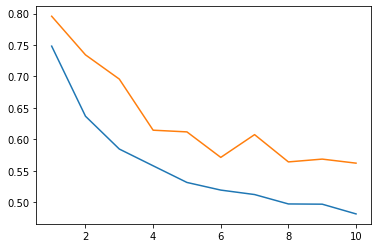

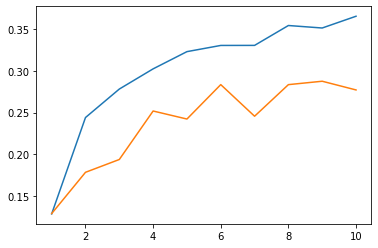

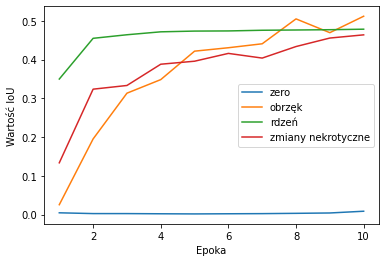

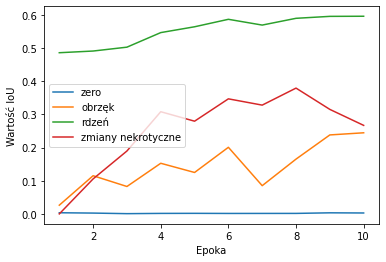

In [27]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
df = pd.read_csv('resunet_v1_dice_kontekstualne_20_1.csv', names=colnames, header=0)
df['epochs'] = range(1, 11)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

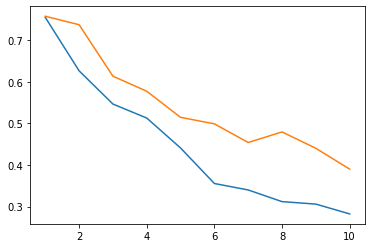

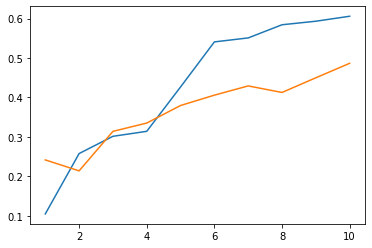

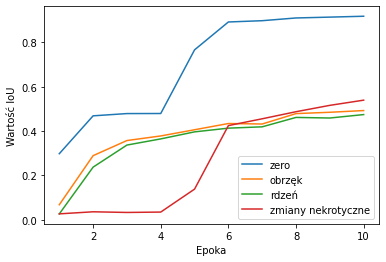

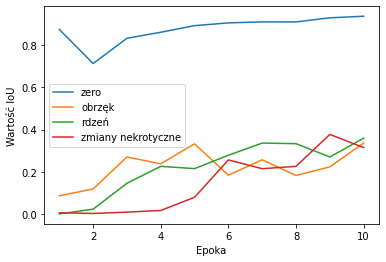

In [28]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
df = pd.read_csv('resunet_v1_dice_kontekstualne_10_1.csv', names=colnames, header=0)
df['epochs'] = range(1, 11)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

Kategoryczna Entropia Krzyżowa

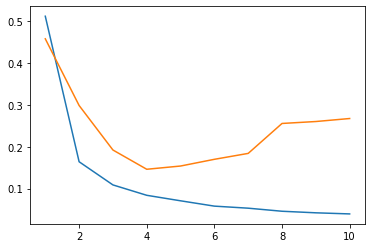

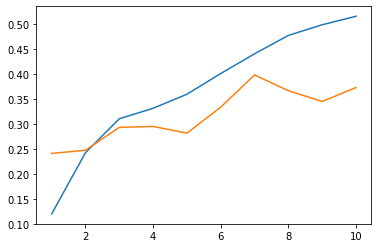

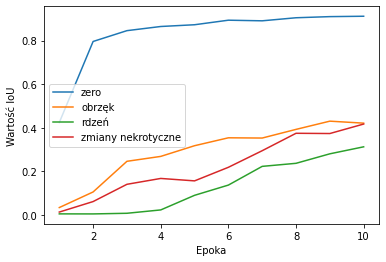

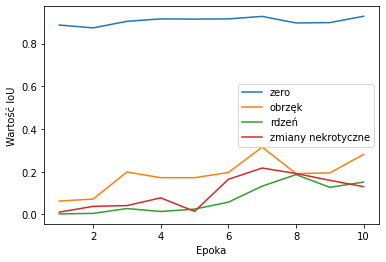

In [29]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
df = pd.read_csv('resunet_v1_cce_kontekstualne_10_1.csv', names=colnames, header=0)
df['epochs'] = range(1, 11)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

Kombinowana funkcja straty

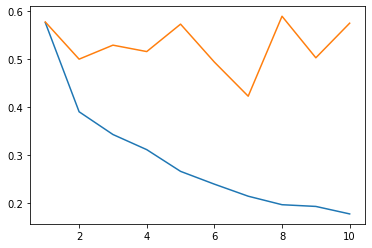

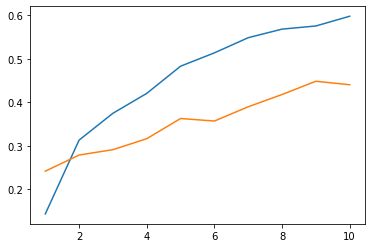

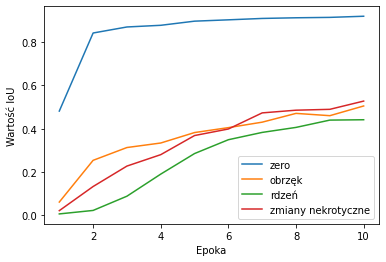

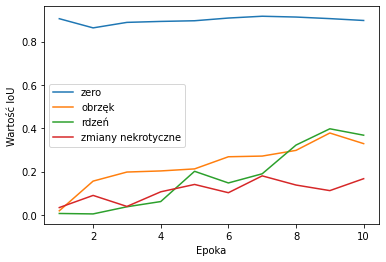

In [30]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
df = pd.read_csv('resunet_v1_combined_kontekstualne_10_1.csv', names=colnames, header=0)
df['epochs'] = range(1, 11)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

Ogniskowa kategoryczna entropia krzyżowa

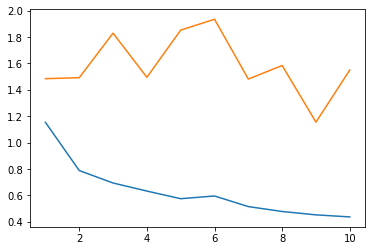

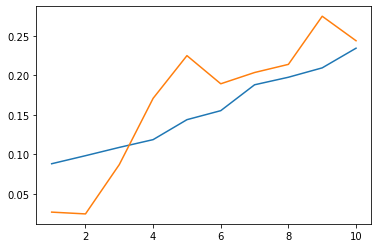

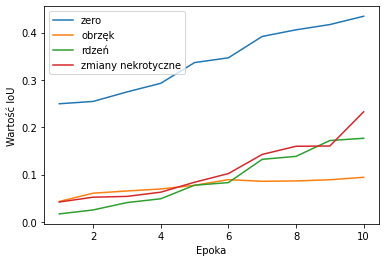

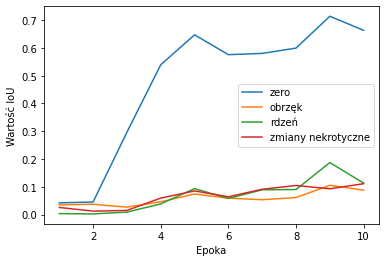

In [31]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
df = pd.read_csv('resunet_v1_focal_kontekstualne_10_1.csv', names=colnames, header=0)
df['epochs'] = range(1, 11)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

Ogniskowa kategoryczna entropia krzyżowa (gamma 1.5)

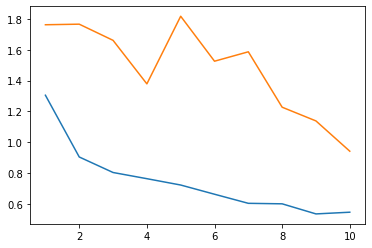

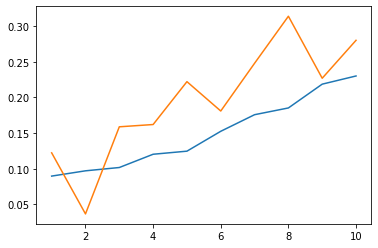

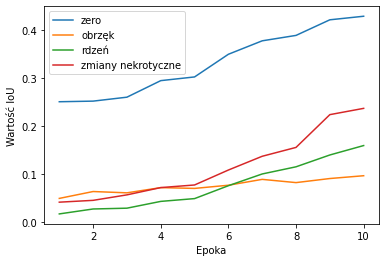

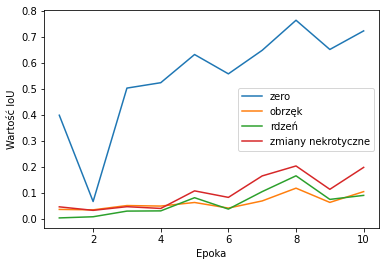

In [32]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
df = pd.read_csv('resunet_v1_focal_1.5_kontekstualne_10_1.csv', names=colnames, header=0)
df['epochs'] = range(1, 11)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

Ważona konbinowana funkcja straty (focal gamma = 1.5 oraz 50/50)

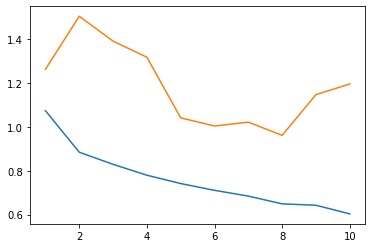

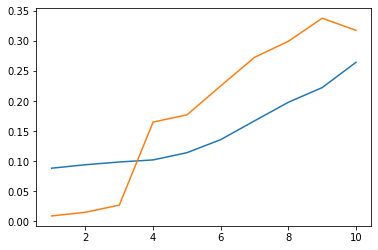

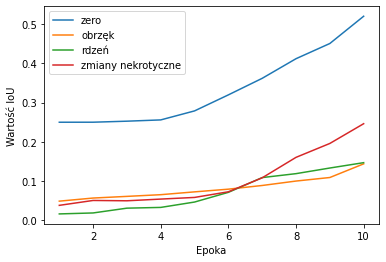

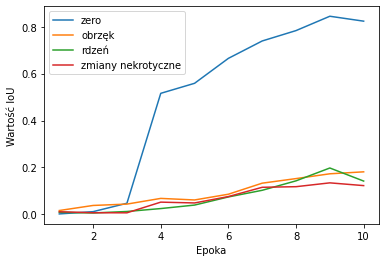

In [33]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']
df = pd.read_csv('resunet_v1_wcombined_kontekstualne_10_1.csv', names=colnames, header=0)
df['epochs'] = range(1, 11)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

# Ewaluacje

In [5]:
test_noaug = [0.3423711955547333,
 0.994265615940094,
 0.9728878736495972,
 0.49827516078948975,
 0.573215901851654,
 0.4551769495010376,
 0.624889075756073,
 0.9965917468070984,
 0.7109353542327881,
 0.8409414887428284,
 0.8249009251594543,
 0.9991841316223145,
 0.6251570582389832,
 0.6427503228187561,
 0.5035880208015442]

test_aug = [0.33675894141197205,
 0.9941903352737427,
 0.9734530448913574,
 0.4976235330104828,
 0.5556719899177551,
 0.46671101450920105,
 0.6233649253845215,
 0.9968370795249939,
 0.6978917121887207,
 0.7981874346733093,
 0.8156013488769531,
 0.9990267157554626,
 0.6343583464622498,
 0.6465551257133484,
 0.5214619040489197]

train_noaug = [0.26877304911613464,
 0.9962154626846313,
 0.9395344257354736,
 0.6171911954879761,
 0.6500241756439209,
 0.5260825157165527,
 0.6832081079483032,
 0.9980407357215881,
 0.7971774935722351,
 0.8220290541648865,
 0.8108845949172974,
 0.9991921782493591,
 0.7322950959205627,
 0.7564086318016052,
 0.5995050668716431]

train_aug = [0.27241456508636475,
 0.9960712194442749,
 0.938637912273407,
 0.6058877110481262,
 0.6308326125144958,
 0.5349751710891724,
 0.6775834560394287,
 0.9980959892272949,
 0.7884575128555298,
 0.7885759472846985,
 0.8004316091537476,
 0.9990922212600708,
 0.7235249280929565,
 0.7593438625335693,
 0.617211103439331]

val_noaug = [0.31991925835609436,
 0.994322657585144,
 0.9702338576316833,
 0.5451403856277466,
 0.5752452611923218,
 0.3933790624141693,
 0.6209996938705444,
 0.9968554973602295,
 0.7639614939689636,
 0.7398720979690552,
 0.7305501699447632,
 0.9989630579948425,
 0.6557646989822388,
 0.7214503884315491,
 0.46025651693344116]

val_aug = [0.3267132639884949,
 0.9941297769546509,
 0.9696255922317505,
 0.5339986681938171,
 0.5551181435585022,
 0.39141467213630676,
 0.6125393509864807,
 0.9968491196632385,
 0.7515109181404114,
 0.7235069870948792,
 0.7199406027793884,
 0.9988816380500793,
 0.648542046546936,
 0.7051595449447632,
 0.4616641402244568]

In [6]:
evaluations = pd.DataFrame([train_noaug, train_aug, val_noaug, val_aug, test_noaug, test_aug], index=['Zbiór treningowy (bez aug.)', 'Zbiór treningowy (z aug.)', 'Zbiór walidacyjny (bez aug.)', 'Zbiór walidacyjny (z aug.)', 'Zbiór testowy (bez aug.)', 'Zbiór testowy (z aug.)'], columns=['loss', 'accuracy', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic'])

In [7]:
evaluations.round(3)

,loss,accuracy,iou_zero,iou_edema,iou_core,iou_necrotic,mean_iou,precision_zero,precision_edema,precision_core,precision_necrotic,recall_zero,recall_edema,recall_core,recall_necrotic
Zbiór treningowy (bez aug.),0.269,0.996,0.940,0.617,0.650,0.526,0.683,0.998,0.797,0.822,0.811,0.999,0.732,0.756,0.600
Zbiór treningowy (z aug.),0.272,0.996,0.939,0.606,0.631,0.535,0.678,0.998,0.788,0.789,0.800,0.999,0.724,0.759,0.617
Zbiór walidacyjny (bez aug.),0.320,0.994,0.970,0.545,0.575,0.393,0.621,0.997,0.764,0.740,0.731,0.999,0.656,0.721,0.460
Zbiór walidacyjny (z aug.),0.327,0.994,0.970,0.534,0.555,0.391,0.613,0.997,0.752,0.724,0.720,0.999,0.649,0.705,0.462
Zbiór testowy (bez aug.),0.342,0.994,0.973,0.498,0.573,0.455,0.625,0.997,0.711,0.841,0.825,0.999,0.625,0.643,0.504
Zbiór testowy (z aug.),0.337,0.994,0.973,0.498,0.556,0.467,0.623,0.997,0.698,0.798,0.816,0.999,0.634,0.647,0.521


In [8]:
elo = evaluations.round(3)
latex_1, latex_2 = '', ''
for index, elem in elo.iterrows():
    siema_1 = np.array([elem.values[:7]], dtype='U64')
    siema_2 = np.array([elem.values[7:]], dtype='U64')
    latex_1 += ' & '.join(np.insert(siema_1, 0, index))
    latex_1 += r' \\'
    latex_1 += '\n'
    latex_2 += ' & '.join(np.insert(siema_2, 0, index))
    latex_2 += r' \\'
    latex_2 += '\n'
print(latex_1)
print(latex_2)

Zbiór treningowy (bez aug.) & 0.269 & 0.996 & 0.94 & 0.617 & 0.65 & 0.526 & 0.683 \\
Zbiór treningowy (z aug.) & 0.272 & 0.996 & 0.939 & 0.606 & 0.631 & 0.535 & 0.678 \\
Zbiór walidacyjny (bez aug.) & 0.32 & 0.994 & 0.97 & 0.545 & 0.575 & 0.393 & 0.621 \\
Zbiór walidacyjny (z aug.) & 0.327 & 0.994 & 0.97 & 0.534 & 0.555 & 0.391 & 0.613 \\
Zbiór testowy (bez aug.) & 0.342 & 0.994 & 0.973 & 0.498 & 0.573 & 0.455 & 0.625 \\
Zbiór testowy (z aug.) & 0.337 & 0.994 & 0.973 & 0.498 & 0.556 & 0.467 & 0.623 \\

Zbiór treningowy (bez aug.) & 0.998 & 0.797 & 0.822 & 0.811 & 0.999 & 0.732 & 0.756 & 0.6 \\
Zbiór treningowy (z aug.) & 0.998 & 0.788 & 0.789 & 0.8 & 0.999 & 0.724 & 0.759 & 0.617 \\
Zbiór walidacyjny (bez aug.) & 0.997 & 0.764 & 0.74 & 0.731 & 0.999 & 0.656 & 0.721 & 0.46 \\
Zbiór walidacyjny (z aug.) & 0.997 & 0.752 & 0.724 & 0.72 & 0.999 & 0.649 & 0.705 & 0.462 \\
Zbiór testowy (bez aug.) & 0.997 & 0.711 & 0.841 & 0.825 & 0.999 & 0.625 & 0.643 & 0.504 \\
Zbiór testowy (z aug.) & 0.99

# Architektura rozwojowa

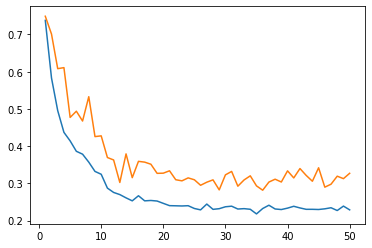

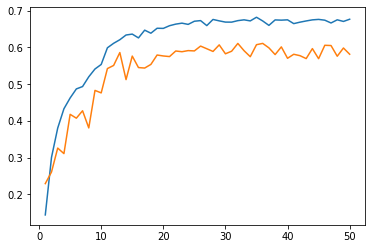

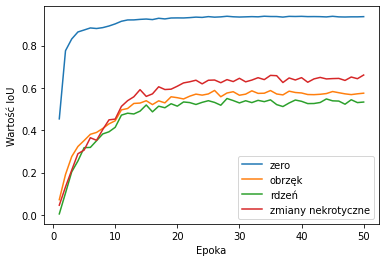

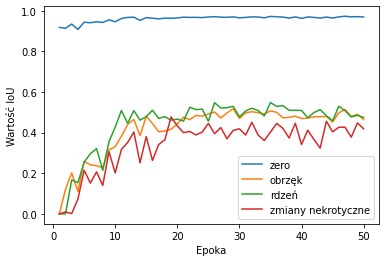

In [3]:
colnames = ['epochs', 'accuracy', 'loss', 'iou_zero', 'iou_edema', 'iou_core', 'iou_necrotic', 'mean_iou', 'precision_zero', 'precision_edema', 'precision_core', 'precision_necrotic', 'recall_zero', 'recall_edema', 'recall_core', 'recall_necrotic', 'val_accuracy', 'val_loss', 'val_iou_zero', 'val_iou_edema', 'val_iou_core', 'val_iou_necrotic', 'val_mean_iou', 'val_precision_zero', 'val_precision_edema', 'val_precision_core', 'val_precision_necrotic', 'val_recall_zero', 'val_recall_edema', 'val_recall_core', 'val_recall_necrotic']

df = pd.read_csv('diunet_v4.1_dice_kontekstualne_10_1.csv', names=colnames, header=0)
df2 = pd.read_csv('diunet_v4.1_dice_kontekstualne_10_1.1.csv', names=colnames, header=0)
df = df._append(df2, ignore_index=True)

df['epochs'] = range(1, 51)

plt.plot(df['epochs'].to_numpy(), df['loss'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_loss'].to_numpy())
plt.show()
plt.plot(df['epochs'].to_numpy(), df['mean_iou'].to_numpy())
plt.plot(df['epochs'].to_numpy(), df['val_mean_iou'].to_numpy())
plt.show()

plt.plot(df['epochs'].to_numpy(), df['iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()


plt.plot(df['epochs'].to_numpy(), df['val_iou_zero'].to_numpy(), label='zero')
plt.plot(df['epochs'].to_numpy(), df['val_iou_edema'].to_numpy(), label='obrzęk')
plt.plot(df['epochs'].to_numpy(), df['val_iou_core'].to_numpy(), label='rdzeń')
plt.plot(df['epochs'].to_numpy(), df['val_iou_necrotic'].to_numpy(), label='zmiany nekrotyczne')
plt.legend() 
plt.xlabel('Epoka')
plt.ylabel('Wartość IoU')
plt.show()

In [4]:
df[['loss', 'val_loss', 'mean_iou', 'val_mean_iou']]

,loss,val_loss,mean_iou,val_mean_iou
0,0.737879,0.749028,0.144285,0.229476
1,0.583145,0.701136,0.300861,0.261107
2,0.495393,0.608184,0.380652,0.326191
3,0.437057,0.610959,0.433201,0.311110
4,0.414119,0.477202,0.462576,0.418001
5,0.386187,0.493891,0.487174,0.407545
6,0.378434,0.467505,0.493611,0.427747
7,0.357036,0.532885,0.520171,0.381054
8,0.332124,0.425652,0.541414,0.483120
9,0.324481,0.427664,0.553725,0.476347
